In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [88]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
df1 = df.copy(deep=True)
df1.shape

(891, 12)

In [90]:
df1.drop(['PassengerId','Name'],axis=1, inplace=True)

In [91]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
df1.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [93]:
df1.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [94]:
df1.Pclass = df1.Pclass.replace(to_replace=[1,2,3],value=[3,2,1])
df1.Pclass.value_counts()

1    491
3    216
2    184
Name: Pclass, dtype: int64

In [95]:
df1.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

Null

In [96]:
df1.shape

(891, 10)

In [97]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

More than 50% null in Cabin so dropping

In [98]:
df1.drop(['Cabin'],axis=1,inplace=True)

In [99]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

Age

<AxesSubplot: >

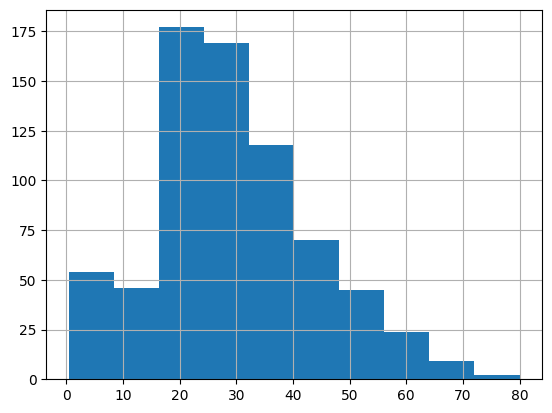

In [100]:
df1.Age.hist()

<AxesSubplot: >

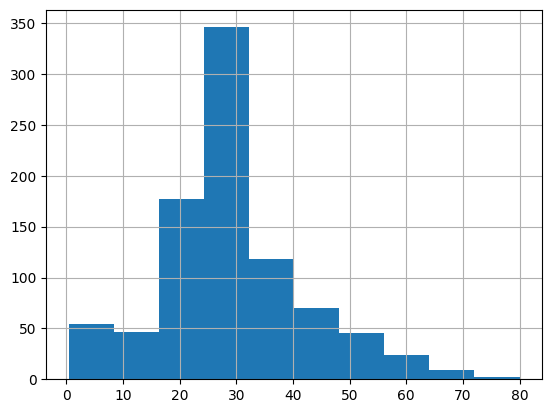

In [101]:
df1.Age = df1.Age.fillna(df1.Age.median())
df1.Age.hist()

In [102]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

Embarked

In [103]:
df1.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [104]:
df1.Embarked.fillna(df1.Embarked.mode().iloc[0],inplace=True)
df1.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [105]:
df1.isnull().values.any()

False

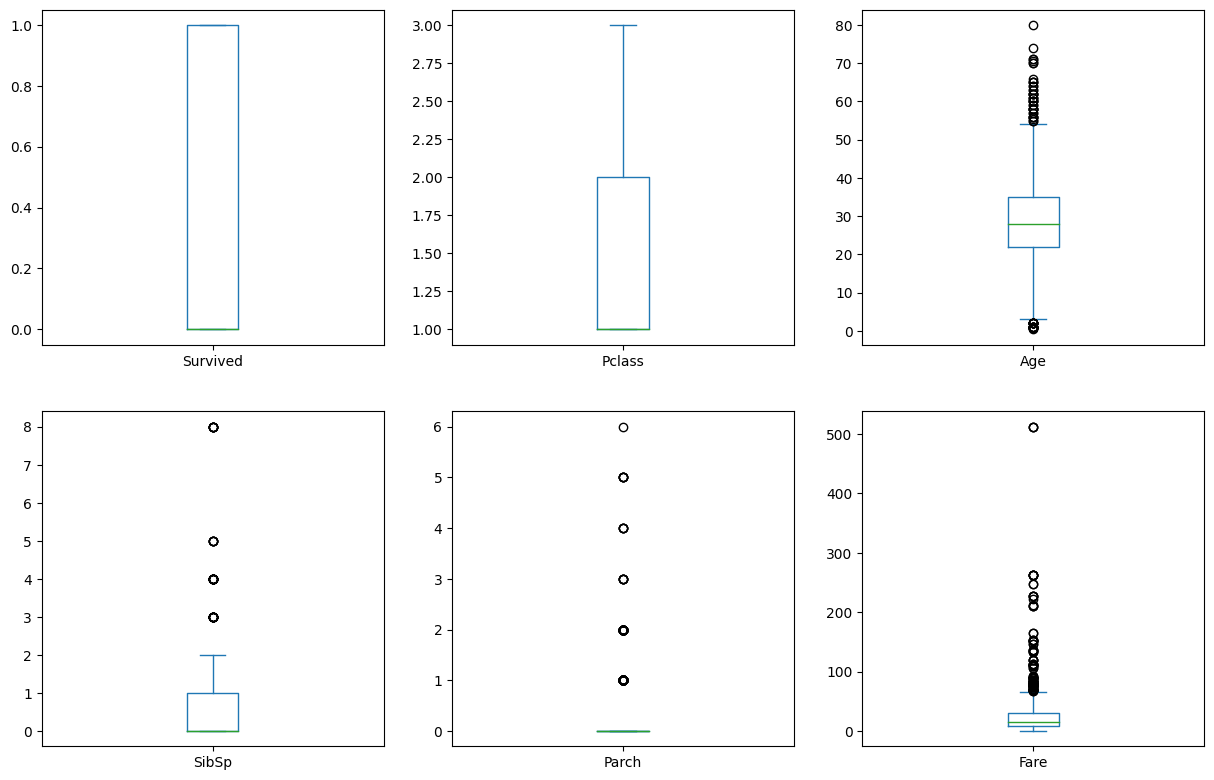

In [106]:
df1.plot(kind = "box",subplots = True,layout = (4,3),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [107]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

In [108]:
rem_list = ['Fare']

In [109]:
df2 = treat_outliers_all(df1 , rem_list)

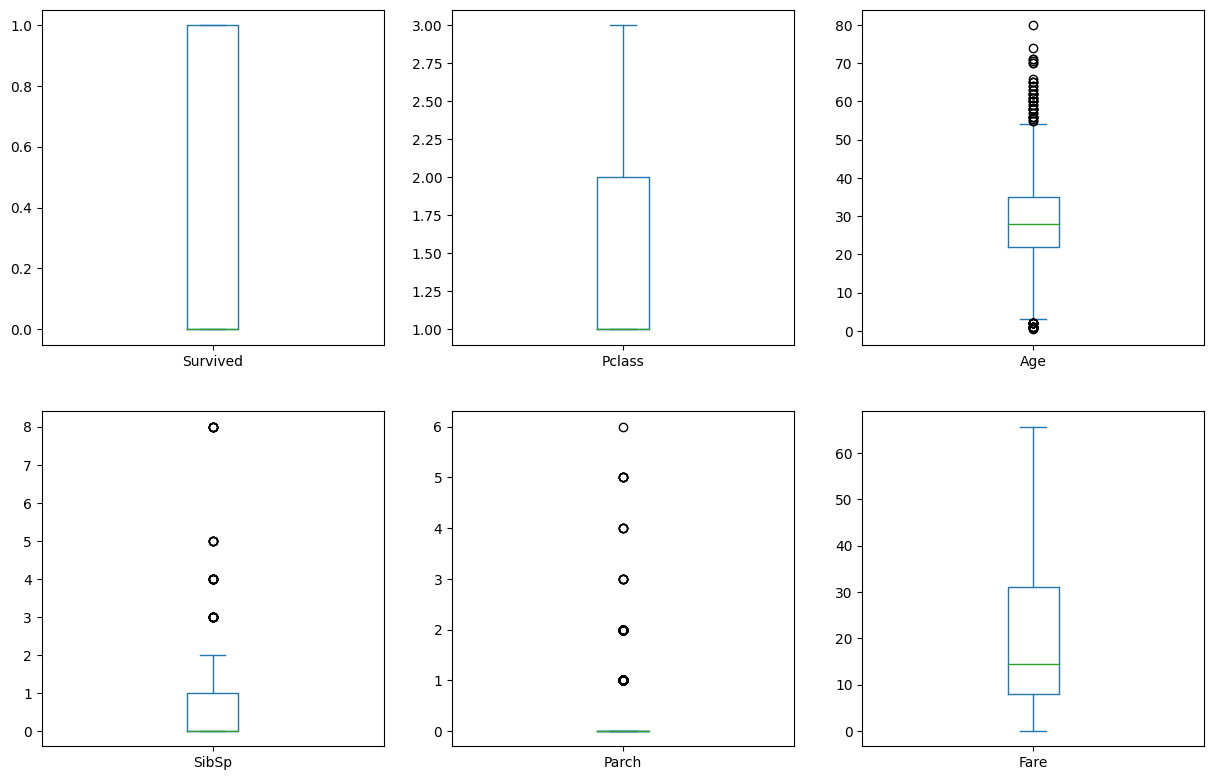

In [110]:
df2.plot(kind = "box",subplots = True,layout = (4,3),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [353]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,418.000000
mean,0.383838,1.691358,29.361582,0.523008,0.381594,24.644000
std,0.486592,0.836071,13.019697,1.102743,0.806057,21.192933
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,2.000000,35.000000,1.000000,0.000000,31.471875
max,1.000000,3.000000,80.000000,8.000000,6.000000,66.835988


In [112]:
df2.drop(['Ticket'],axis=1,inplace=True)

In [114]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,male,22.0,1,0,7.2500,S
1,1,3,female,38.0,1,0,65.6344,C
2,1,1,female,26.0,0,0,7.9250,S
3,1,3,female,35.0,1,0,53.1000,S
4,0,1,male,35.0,0,0,8.0500,S


In [115]:
categorical = [var for var in df2.columns if df2[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
if len(categorical)>=1:
    print('The categorical variables :', categorical)

There are 2 categorical variables

The categorical variables : ['Sex', 'Embarked']


In [116]:
df3 = pd.get_dummies(data = df2, columns=categorical, drop_first=True)
df2.shape, df3.shape

((891, 8), (891, 9))

In [118]:
X = df3.drop(['Survived'],axis=1)
y = df3.Survived

X.shape, y.shape

((891, 8), (891,))

In [119]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [120]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,stratify=y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

smote because there is imbalance

In [121]:
from imblearn.over_sampling import SMOTE

In [122]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [123]:
y_train.value_counts()

1    439
0    439
Name: Survived, dtype: int64

In [128]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [131]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [393]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [132]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8030
Test set score: 0.8045


In [133]:
y_pred = logreg.predict(X_test)

In [134]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 16],
       [19, 50]], dtype=int64)

In [135]:
log_accuracy = logreg.score(X_test, y_test)
log_accuracy

0.8044692737430168

In [136]:
# precision
log_pre = precision_score(y_test, y_pred)
log_pre

0.7575757575757576

In [137]:
# recall
log_rec = recall_score(y_test, y_pred)
log_rec

0.7246376811594203

KNN

In [138]:
from math import sqrt
print(sqrt(X_train.shape[1]))

2.8284271247461903


In [141]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,verbose=1,cv=6)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 6 folds for each of 19 candidates, totalling 114 fits
Best Score:0.7768614295033082
Best Parameters: {'n_neighbors': 4}


In [142]:
print('Training set score: {:.4f}'.format(knn_cv.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn_cv.score(X_test, y_test)))

Training set score: 0.8576
Test set score: 0.6592


In [143]:
y_pred = knn_cv.predict(X_test)

In [144]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[88, 22],
       [39, 30]], dtype=int64)

In [145]:
knn_accuracy = knn_cv.score(X_test, y_test)
knn_accuracy

0.659217877094972

In [146]:
# precision
knn_pre = precision_score(y_test, y_pred)
knn_pre

0.5769230769230769

In [147]:
# recall
knn_rec = recall_score(y_test, y_pred)
knn_rec

0.43478260869565216

Random Forests

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestClassifier(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [153]:
y_pred = clf.predict(X_test)

In [156]:
print('Training set score: {:.4f}'.format(clf.score(X_train,y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9032
Test set score: 0.8156


In [159]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

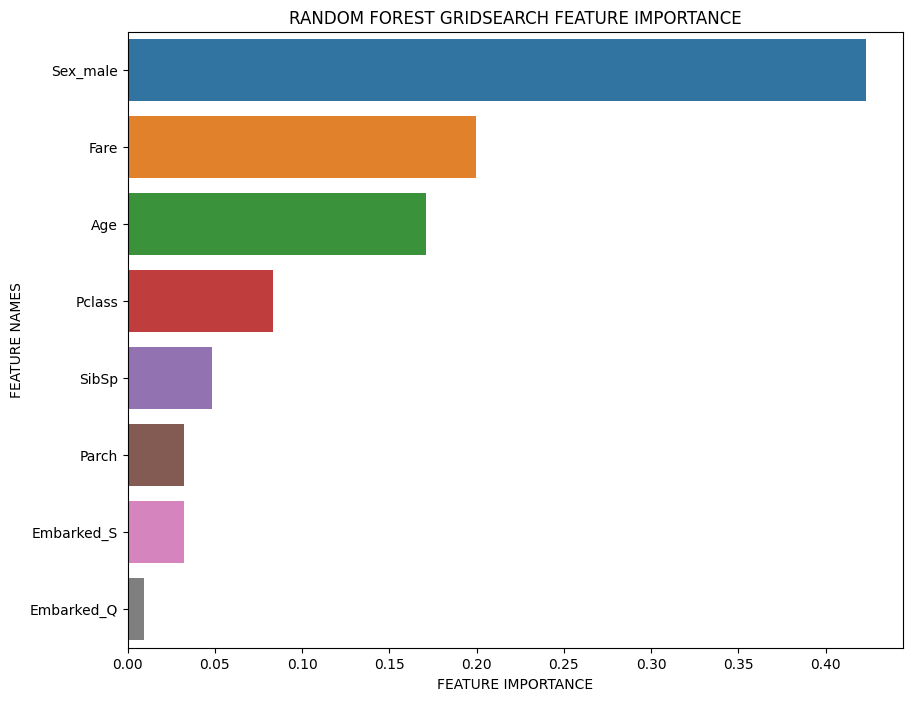

In [160]:
plot_feature_importance(clf.best_estimator_.feature_importances_,X_train_RF.columns,'RANDOM FOREST GRIDSEARCH ')

In [161]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[93, 17],
       [23, 46]], dtype=int64)

In [163]:
rfcv_accuracy = clf.score(X_test, y_test)
rfcv_accuracy

0.8156424581005587

In [164]:
# precision
rfcv_pre = precision_score(y_test, y_pred)
rfcv_pre

0.7301587301587301

In [165]:
# recall
rfcv_rec = recall_score(y_test, y_pred)
rfcv_rec

0.6666666666666666

In [166]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [180]:
titanic_model = Sequential()
titanic_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
titanic_model.add(Dense(512, activation = "relu"))
titanic_model.add(Dense(1024, activation = "relu"))
titanic_model.add(Dropout(0.2))
titanic_model.add(Dense(1024, activation = "relu"))
titanic_model.add(Dense(512, activation = "relu"))
titanic_model.add(Dense(256, activation = "relu"))
titanic_model.add(Flatten())
titanic_model.add(Dense(512, activation = "relu"))
titanic_model.add(Dropout(0.5))
titanic_model.add(Dense(512, activation = "relu"))
titanic_model.add(Dropout(0.5))
# titanic_model.add(Dense(1, activation = "sigmoid",kernel_regularizer = "binary_crossentropy"))
titanic_model.add(Dense(1, activation = "sigmoid"))
titanic_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               2304      
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dense_11 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 256)              

In [181]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
losses = tf.keras.losses.binary_crossentropy
titanic_model.compile(optimizer=optimizer, loss=losses, metrics=['accuracy'])

In [182]:
m_loss = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=15,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [183]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='titanic_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [184]:
history=titanic_model.fit(X_train, y_train, epochs=100,validation_split=0.2, batch_size=64, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 0.7064 - accuracy: 0.6140
Epoch 1: val_accuracy improved from -inf to 0.03977, saving model to titanic_model.h5
11/11 [==============================] - 1s 35ms/step - loss: 0.7064 - accuracy: 0.6140 - val_loss: 1.0872 - val_accuracy: 0.0398
Epoch 2/100
11/11 [==============================] - ETA: 0s - loss: 0.6228 - accuracy: 0.6610
Epoch 2: val_accuracy improved from 0.03977 to 0.47727, saving model to titanic_model.h5
11/11 [==============================] - 0s 23ms/step - loss: 0.6228 - accuracy: 0.6610 - val_loss: 1.0176 - val_accuracy: 0.4773
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 0.6197 - accuracy: 0.6809
Epoch 3: val_accuracy did not improve from 0.47727
11/11 [==============================] - 0s 14ms/step - loss: 0.6197 - accuracy: 0.6809 - val_loss: 0.9729 - val_accuracy: 0.0909
Epoch 4/100
 6/11 [===============>..............] - ETA: 0s - loss: 0.6093 - accuracy: 0.6589
Epoc

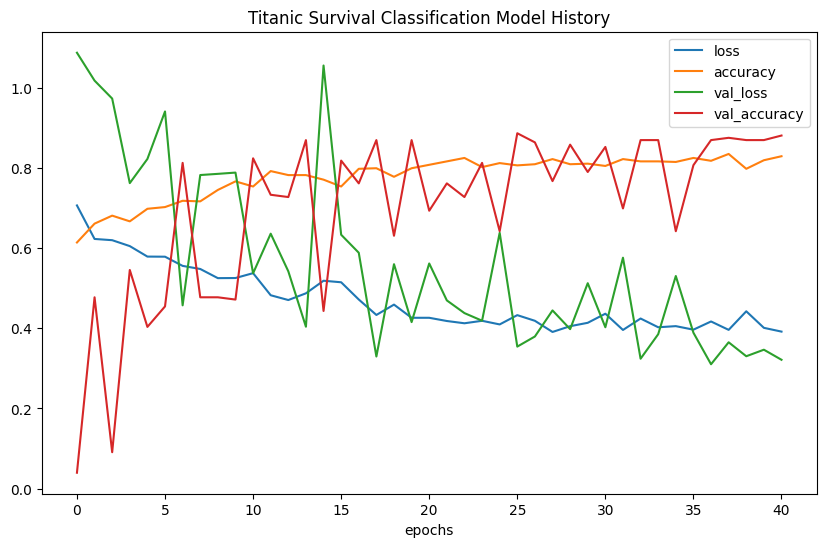

In [186]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Titanic Survival Classification Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [187]:
print("Evaluate titanic_model against trained data")
score = titanic_model.evaluate(X_train, y_train, verbose=0)
print("score %s: %.2f%%" % (titanic_model.metrics_names[1], score[1]*100))

print("Evaluate titanic_model against test data")
score = titanic_model.evaluate(X_test, y_test, verbose=0)
print("score %s: %.2f%%" % (titanic_model.metrics_names[1], score[1]*100))

Evaluate titanic_model against trained data
score accuracy: 80.98%
Evaluate titanic_model against test data
score accuracy: 76.54%


In [188]:
y_pred = titanic_model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [189]:
# extract the predicted probabilities
p_pred = titanic_model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))

6/6 [==============================] - 0s 2ms/step
[0.22 0.21 0.23 0.18 0.71 0.55 0.73 0.49 0.79 0.32 0.25 0.23 0.54 0.49
 0.48 0.26 0.5  0.18 0.2  0.74 0.18 0.79 0.17 0.55 0.17 0.99 0.25 0.54
 0.21 0.25 0.16 0.99 0.23 0.18 0.25 0.32 0.33 0.22 0.25 0.68 0.52 1.
 0.24 0.74 0.78 0.19 0.19 0.51 0.91 0.85 0.99 0.54 0.71 0.27 0.88 0.18
 0.19 0.5  0.57 0.5  0.65 0.67 0.2  0.35 0.74 0.53 0.99 0.18 0.5  0.27
 0.94 0.21 0.66 1.   0.27 0.2  0.16 0.17 0.16 0.34 0.47 0.2  0.24 0.18
 0.74 0.72 0.23 0.56 0.54 0.97 0.57 0.57 0.13 0.18 0.77 0.88 0.57 0.25
 0.16 0.01 0.5  0.74 0.72 0.9  0.18 0.57 0.28 0.18 0.2  0.82 0.25 0.05
 0.18 0.65 0.87 0.25 0.31 0.21 0.2  0.5  0.18 0.62 0.14 0.27 0.2  0.4
 0.71 0.55 0.18 0.52 0.5  0.17 0.71 0.23 0.72 0.2  1.   0.25 0.71 0.18
 0.7  0.22 1.   0.68 0.23 0.62 0.18 0.34 0.8  0.88 0.17 0.38 0.74 0.64
 0.5  0.57 0.27 0.2  0.5  0.87 0.67 0.96 0.71 0.98 0.99 0.57 0.17 0.5
 0.76 0.56 0.15 0.21 0.55 0.26 0.78 0.19 0.26 0.82 0.3 ]


In [190]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0
 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0]


In [191]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[82, 28],
       [14, 55]], dtype=int64)

In [192]:
cnn_accuracy = (82+55)/(82+55+14+28)
cnn_accuracy

0.7653631284916201

In [193]:
# precision
cnn_pre = precision_score(y_test, y_pred)
cnn_pre

0.6626506024096386

In [194]:
# recall
cnn_rec = recall_score(y_test, y_pred)
cnn_rec

0.7971014492753623

lgbm

In [242]:
import lightgbm as lgb
lgbm_clf = lgb.LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

LGBMClassifier()

In [390]:
lgbm_clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [243]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(lgbm_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lgbm_clf.score(X_test, y_test)))

Training set score: 0.9658
Test set score: 0.8101


In [244]:
y_pred=lgbm_clf.predict(X_test)

In [245]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 16],
       [18, 51]], dtype=int64)

In [246]:
lgbm_accuracy = lgbm_clf.score(X_test, y_test)
lgbm_accuracy

0.8100558659217877

In [247]:
# precision
lgbm_pre = precision_score(y_test, y_pred)
lgbm_pre

0.7611940298507462

In [248]:
# recall
lgbm_rec = recall_score(y_test, y_pred)
lgbm_rec

0.7391304347826086

Hyperparameter tuning

XGB

In [320]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score
# can change the range to get better results
def objective(trial):
    # Define the hyperparameters to optimize
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 1e2, log=True),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e0, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500, step=15),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'eta': trial.suggest_float('eta', 1e-8, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'n_jobs': 6,
        'random_state': 0
    }

    # Split the data into training and testing sets
    # X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

    # Train the model
    model = xgb.XGBClassifier(**param)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)

    return auc


In [321]:
import optuna
# Can change the number of trials to check for better results
study = optuna.create_study(direction='maximize', study_name='XGB Classifier')
study.optimize(objective, n_trials=600)

[I 2023-03-04 17:51:39,328] A new study created in memory with name: XGB Classifier
[I 2023-03-04 17:51:39,367] Trial 0 finished with value: 0.5 and parameters: {'reg_lambda': 14.997103088543984, 'learning_rate': 0.00020169132580181106, 'n_estimators': 110, 'lambda': 0.18151034592757762, 'alpha': 0.7391892394890236, 'max_depth': 8, 'eta': 0.8135523620710978, 'gamma': 0.9672088163457866, 'subsample': 0.21489740586783335, 'colsample_bytree': 0.8540528603768499, 'min_child_weight': 294}. Best is trial 0 with value: 0.5.
[I 2023-03-04 17:51:39,418] Trial 1 finished with value: 0.5 and parameters: {'reg_lambda': 2.4807854572075634, 'learning_rate': 0.0005237512895964893, 'n_estimators': 200, 'lambda': 0.0891700973020384, 'alpha': 0.8180998684604843, 'max_depth': 8, 'eta': 0.8065762443817382, 'gamma': 0.9921396411411498, 'subsample': 0.16831087177948678, 'colsample_bytree': 0.6991362646804687, 'min_child_weight': 133}. Best is trial 0 with value: 0.5.
[I 2023-03-04 17:51:39,458] Trial 2 fini

In [326]:
print("Important parameters For XGB is")
print(optuna.importance.get_param_importances(study))

Important parameters For XGB is
OrderedDict([('min_child_weight', 0.837857460396121), ('max_depth', 0.03829544181173947), ('alpha', 0.03356809940587395), ('lambda', 0.02840654478883452), ('colsample_bytree', 0.023477432712289747), ('learning_rate', 0.014151373845600973), ('eta', 0.012437640388154435), ('subsample', 0.009892306124729104), ('n_estimators', 0.001068360909729121), ('gamma', 0.0008393706278752686), ('reg_lambda', 5.968989052411977e-06)])


In [385]:
best_params = study.best_trial.params
print("Best Parameter For XGB is")
print(best_params)

Best Parameter For XGB is
{'reg_lambda': 0.013543463072918725, 'learning_rate': 0.046672881783627655, 'n_estimators': 410, 'lambda': 0.008115113628130671, 'alpha': 0.9540999301615802, 'max_depth': 3, 'eta': 0.6754638021374282, 'gamma': 0.3381768967168981, 'subsample': 0.571438092697773, 'colsample_bytree': 0.3183118604374744, 'min_child_weight': 7}


In [328]:
model_xgb = xgb.XGBClassifier(objective='binary:logistic', **best_params)
model_xgb.fit(X_train,y_train)

XGBClassifier(alpha=0.9540999301615802, base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.3183118604374744, early_stopping_rounds=None,
              enable_categorical=False, eta=0.6754638021374282,
              eval_metric=None, feature_types=None, gamma=0.3381768967168981,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', lambda=0.008115113628130671,
              learning_rate=0.046672881783627655, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=410, n_jobs=0, ...)

In [330]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(model_xgb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_xgb.score(X_test, y_test)))

Training set score: 0.8531
Test set score: 0.8324


In [331]:
y_pred=model_xgb.predict(X_test)

In [332]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[97, 13],
       [17, 52]], dtype=int64)

In [333]:
xgb_accuracy = model_xgb.score(X_test, y_test)
xgb_accuracy

0.8324022346368715

In [334]:
# precision
xgb_pre = precision_score(y_test, y_pred)
xgb_pre

0.8

In [335]:
# recall
xgb_rec = recall_score(y_test, y_pred)
xgb_rec

0.7536231884057971

Catboost

In [291]:
from catboost import CatBoostClassifier, Pool
import sklearn
import catboost

def objective(trial):
    train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

    params = {
        'loss_function': 'Logloss',
        'eval_metric': 'Accuracy',
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
        'depth': trial.suggest_int('depth', 1, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 1e2),
        'random_strength': trial.suggest_float('random_strength', 1e-5, 1e2),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait': trial.suggest_int('od_wait', 10, 50),
        'iterations': trial.suggest_int("iterations",500,2000)
    }

    if params['od_type'] == 'Iter':
        del params['od_wait']

    train_pool = Pool(train_x, train_y)
    valid_pool = Pool(valid_x, valid_y)

    model = CatBoostClassifier(**params)
    model.fit(train_pool, eval_set=valid_pool, use_best_model=True, verbose=False)

    y_pred = model.predict(valid_x)
    accuracy = sklearn.metrics.accuracy_score(valid_y, y_pred)

    return 1.0 - accuracy

In [292]:
study = optuna.create_study(direction="minimize",study_name="CatBoost Classifier")
study.optimize(objective, n_trials=100, timeout=600)

[I 2023-03-04 17:38:14,629] A new study created in memory with name: CatBoost Classifier
[I 2023-03-04 17:38:14,792] Trial 0 finished with value: 0.17318435754189943 and parameters: {'learning_rate': 0.08948546459026686, 'depth': 4, 'l2_leaf_reg': 43.77762176263715, 'random_strength': 40.52085450070306, 'od_type': 'Iter', 'od_wait': 43, 'iterations': 1223}. Best is trial 0 with value: 0.17318435754189943.
[I 2023-03-04 17:38:14,877] Trial 1 finished with value: 0.16201117318435754 and parameters: {'learning_rate': 0.06831654887229811, 'depth': 6, 'l2_leaf_reg': 1.2289816906103255, 'random_strength': 62.66109141441926, 'od_type': 'Iter', 'od_wait': 27, 'iterations': 1078}. Best is trial 1 with value: 0.16201117318435754.
[I 2023-03-04 17:38:15,018] Trial 2 finished with value: 0.17318435754189943 and parameters: {'learning_rate': 0.06506584642907182, 'depth': 3, 'l2_leaf_reg': 84.42141121410488, 'random_strength': 48.41934414511688, 'od_type': 'Iter', 'od_wait': 46, 'iterations': 1490}.

In [293]:
print("Important parameters For cat is")
print(optuna.importance.get_param_importances(study))

Important parameters For cat is
OrderedDict([('od_type', 0.6326352426347975), ('od_wait', 0.18457987952676136), ('depth', 0.08552446868952594), ('learning_rate', 0.048533468493920075), ('iterations', 0.026987101198979475), ('l2_leaf_reg', 0.013871318397578403), ('random_strength', 0.007868521058437297)])


In [294]:
best_params_cat = study.best_trial.params
print("Best Parameter For cat is")
print(best_params_cat)

Best Parameter For cat is
{'learning_rate': 0.05586579539823147, 'depth': 3, 'l2_leaf_reg': 46.565339582806104, 'random_strength': 1.0010682857817434, 'od_type': 'IncToDec', 'od_wait': 40, 'iterations': 1496}


In [299]:
model_cat = CatBoostClassifier(**best_params_cat)
model_cat.fit(X_train,y_train)

0:	learn: 0.6677158	total: 3.01ms	remaining: 4.5s
1:	learn: 0.6411147	total: 4.25ms	remaining: 3.18s
2:	learn: 0.6154078	total: 5.26ms	remaining: 2.62s
3:	learn: 0.5956160	total: 6.22ms	remaining: 2.32s
4:	learn: 0.5798240	total: 7.19ms	remaining: 2.14s
5:	learn: 0.5665030	total: 8.13ms	remaining: 2.02s
6:	learn: 0.5499796	total: 9.07ms	remaining: 1.93s
7:	learn: 0.5397846	total: 10.1ms	remaining: 1.87s
8:	learn: 0.5299855	total: 11ms	remaining: 1.82s
9:	learn: 0.5198856	total: 12ms	remaining: 1.78s
10:	learn: 0.5113214	total: 12.9ms	remaining: 1.74s
11:	learn: 0.5011788	total: 13.9ms	remaining: 1.71s
12:	learn: 0.4940488	total: 14.7ms	remaining: 1.68s
13:	learn: 0.4859517	total: 15.9ms	remaining: 1.68s
14:	learn: 0.4781639	total: 16.8ms	remaining: 1.66s
15:	learn: 0.4732804	total: 17.7ms	remaining: 1.64s
16:	learn: 0.4673500	total: 18.7ms	remaining: 1.63s
17:	learn: 0.4629704	total: 19.6ms	remaining: 1.61s
18:	learn: 0.4586995	total: 20.5ms	remaining: 1.59s
19:	learn: 0.4548992	total:

In [300]:
#print the scores on training and test set

print('Training set score: {:.4f}'.format(model_cat.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_cat.score(X_test, y_test)))

Training set score: 0.9089
Test set score: 0.7989


In [336]:
y_pred=model_cat.predict(X_test)

In [337]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[96, 14],
       [22, 47]], dtype=int64)

In [338]:
cat_accuracy = model_cat.score(X_test, y_test)
cat_pre = precision_score(y_test, y_pred)
cat_rec = recall_score(y_test, y_pred)

In [339]:
# creating performance dictionary
performance = {'Accuracy_Score':[log_accuracy, knn_accuracy, rfcv_accuracy, cnn_accuracy,lgbm_accuracy,xgb_accuracy,cat_accuracy],
              'Precision':[log_pre, knn_pre, rfcv_pre, cnn_pre,lgbm_pre,xgb_pre,cat_pre],
              'Recall': [log_rec, knn_rec, rfcv_rec, cnn_rec,lgbm_rec,xgb_rec,cat_rec]}

In [340]:
performance_df = pd.DataFrame(data = performance, index= ['Logistic Regression', 'KNeighbors', 
                                                             'RandomForest Gridsearch',
                                                                'ANN','LGBMClassifier','XGBClassifier','CatBoostClassifier'])

In [341]:
performance_df.sort_values(by=['Accuracy_Score'],ascending=False)

,Accuracy_Score,Precision,Recall
XGBClassifier,0.832402,0.800000,0.753623
RandomForest Gridsearch,0.815642,0.730159,0.666667
LGBMClassifier,0.810056,0.761194,0.739130
Logistic Regression,0.804469,0.757576,0.724638
CatBoostClassifier,0.798883,0.770492,0.681159
ANN,0.765363,0.662651,0.797101
KNeighbors,0.659218,0.576923,0.434783


Test

In [364]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [365]:
test_df_1 = test_df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
test_df_1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [366]:
test_df_1.Pclass = test_df_1.Pclass.replace(to_replace=[1,2,3],value=[3,2,1])
test_df_1.Pclass.value_counts()

1    218
3    107
2     93
Name: Pclass, dtype: int64

In [367]:
test_df_1.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [368]:
test_df_1.Age.fillna(df1.Age.median(),inplace=True)
test_df_1.Fare.fillna(df1.Fare.median(),inplace=True)
test_df_1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [369]:
test_df_2 = pd.get_dummies(data = test_df_1,columns=categorical,drop_first=True)
test_df_2.shape

(418, 8)

In [370]:
sample = pd.read_csv('gender_submission.csv')
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Best model XGB

In [372]:
y_pred_test_xgb = model_xgb.predict(test_df_2)

In [375]:
submission = pd.DataFrame({'PassengerId':sample['PassengerId'],'Survived':y_pred_test_xgb})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [377]:
submission.to_csv('solo_xgb_subs.csv',index=False)

xgb best params on full data

In [386]:
model_xgb = xgb.XGBClassifier(objective='binary:logistic', **best_params)
model_xgb.fit(X,y)

XGBClassifier(alpha=0.9540999301615802, base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.3183118604374744, early_stopping_rounds=None,
              enable_categorical=False, eta=0.6754638021374282,
              eval_metric=None, feature_types=None, gamma=0.3381768967168981,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', lambda=0.008115113628130671,
              learning_rate=0.046672881783627655, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=410, n_jobs=0, ...)

In [387]:
y_pred_test_xgb = model_xgb.predict(test_df_2)

In [388]:
submission = pd.DataFrame({'PassengerId':sample['PassengerId'],'Survived':y_pred_test_xgb})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [389]:
submission.to_csv('solo_xgb_fulldata_subs.csv',index=False)

Ensemble xgb and lgbm

In [378]:
y_pred_test_lgbm = lgbm_clf.predict(test_df_2)

In [381]:
y_pred_test_lr = logreg.predict(test_df_2)

In [382]:
import numpy as np

# Combine the predictions into a single array
ensemble_preds = np.array([y_pred_test_lgbm, y_pred_test_xgb, y_pred_test_lr])

# Take the mode (most common value) of each row to get the final ensemble prediction
final_preds = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=ensemble_preds)

final_preds = final_preds.reshape(-1,)

In [ ]:
submission = pd.DataFrame({'PassengerId':sample['PassengerId'],'Survived':final_preds})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [384]:
submission.to_csv('ens_xgb_lgbm_lr_subs.csv',index=False)

Ens on full data

lbgm

In [392]:
import lightgbm as lgb
lgbm_clf = lgb.LGBMClassifier(boosting_type= 'gbdt',
 class_weight= None,
 colsample_bytree= 1.0,
 importance_type= 'split',
 learning_rate= 0.1,
 max_depth= -1,
 min_child_samples= 20,
 min_child_weight= 0.001,
 min_split_gain= 0.0,
 n_estimators= 100,
 n_jobs= -1,
 num_leaves= 31,
 objective= None,
 random_state= None,
 reg_alpha= 0.0,
 reg_lambda= 0.0,
 silent= 'warn',
 subsample= 1.0,
 subsample_for_bin= 200000,
 subsample_freq= 0)
lgbm_clf.fit(X, y)

LGBMClassifier()

In [396]:

# instantiate the model
logreg = LogisticRegression(C= 1.0,
 class_weight= None,
 dual= False,
 fit_intercept= True,
 intercept_scaling= 1,
 l1_ratio= None,
 max_iter= 100,
 multi_class= 'auto',
 n_jobs= None,
 penalty= 'l2',
 random_state= 0,
 solver= 'liblinear',
 tol= 0.0001,
 verbose= 0,
 warm_start= False)

# fit the model
logreg.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

In [397]:
y_pred_test_full_lgb = lgbm_clf.predict(test_df_2)
y_pred_test_full_lr = logreg.predict(test_df_2)

In [398]:
import numpy as np

# Combine the predictions into a single array
ensemble_preds = np.array([y_pred_test_full_lgb, y_pred_test_full_lr, y_pred_test_xgb])

# Take the mode (most common value) of each row to get the final ensemble prediction
final_preds = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=ensemble_preds)

final_preds = final_preds.reshape(-1,)

In [399]:
submission = pd.DataFrame({'PassengerId':sample['PassengerId'],'Survived':final_preds})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
submission.to_csv('ens_xgb_lgbm_lr_fulldata_subs.csv',index=False)